# Bayesian Statistcs

In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import savingfigR as sf
import math as math 

## Likelihood of W for a single toss

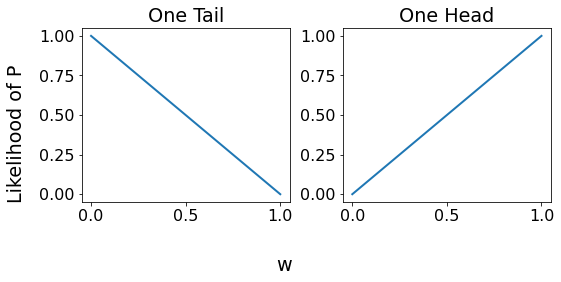

In [2]:
binomlike = lambda n, y, w: (math.factorial(n) / (math.factorial(y) * math.factorial(n-y))) * w**y * (1 - w)**(n-y)
w = np.linspace(0, 1, 500)

fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(w, binomlike(1, 0, w), lw=2)
plt.title('One Tail')
plt.subplot(1,2,2)
plt.plot(w, binomlike(1, 1, w), lw=2)
plt.title('One Head')

fig.supxlabel('w')
fig.supylabel('Likelihood of P')
plt.tight_layout()
plt.show()

sf.best_save(fig, 'singletoss')

## Likelihood of P for 3 tosses

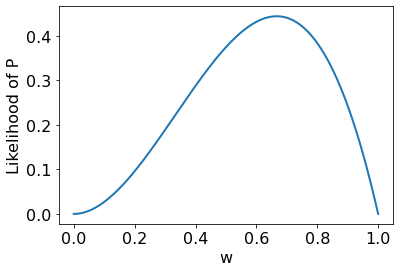

In [3]:
fig = plt.figure()
plt.plot(w, binomlike(3, 2, w), lw=2)
plt.xlabel('w')
plt.ylabel('Likelihood of P')
plt.show()

sf.best_save(fig, '3toss')

## Beta Distributoin Conjugate Prior

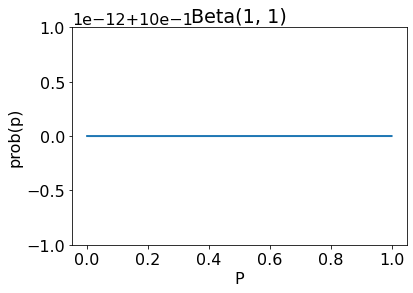

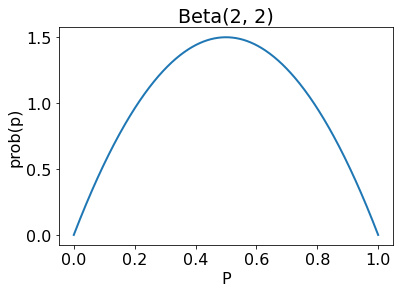

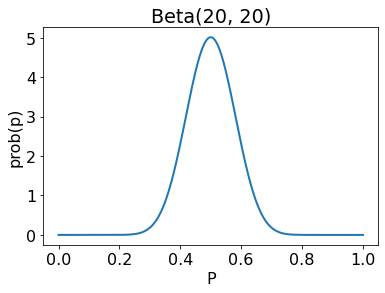

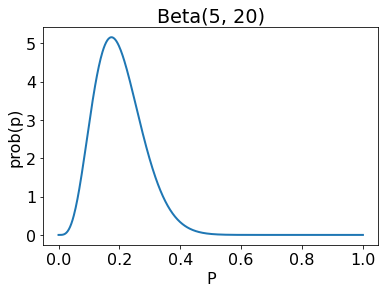

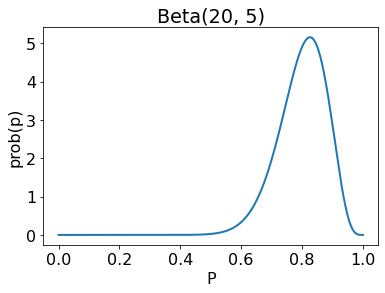

In [4]:
alpha = [1,2,20,5,20]
beta = [1,2,20,20,5]

for i in range(len(alpha)):
    fig = plt.figure()
    plt.plot(w, stats.beta.pdf(w, alpha[i], beta[i]), lw=2)
    plt.xlabel('P')
    plt.ylabel('prob(p)')
    plt.title(f'Beta({alpha[i]:.0f}, {beta[i]:.0f})')
    plt.show()

    sf.best_save(fig, f'beta_{alpha[i]:.0f}_{beta[i]:.0f}')

## Toss One - Heads

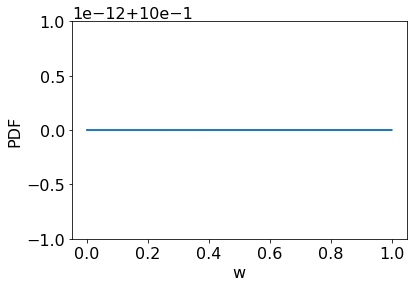

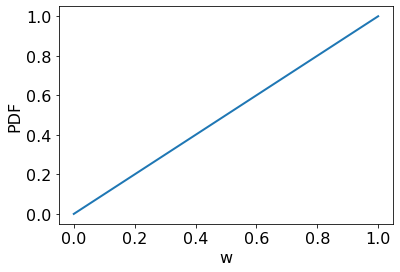

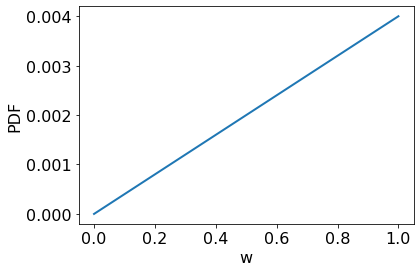

In [5]:
prior = stats.beta.pdf(w, 1, 1)
likelihood = binomlike(1, 1, w)
posterior = prior * likelihood
posterior /= np.sum(posterior)

fig = plt.figure()
plt.plot(w, prior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss1_head_prior')

fig = plt.figure()
plt.plot(w, likelihood, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss1_head_like')

fig = plt.figure()
plt.plot(w, posterior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss1_head_post')

## Toss Two - Tails

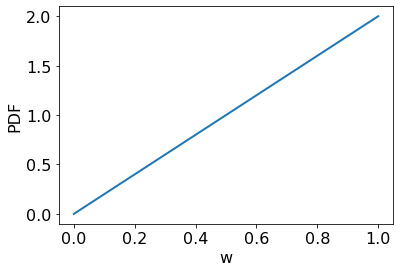

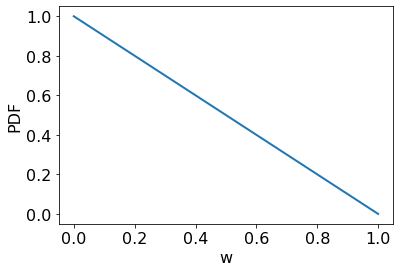

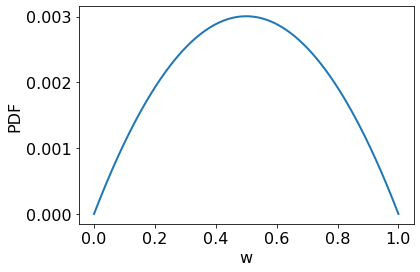

In [6]:
prior = stats.beta.pdf(w, 2, 1)
likelihood = binomlike(1, 0, w)
posterior = prior * likelihood
posterior /= np.sum(posterior)

fig = plt.figure()
plt.plot(w, prior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss2_tails_prior')

fig = plt.figure()
plt.plot(w, likelihood, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss2_tails_like')

fig = plt.figure()
plt.plot(w, posterior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss2_tails_post')

## Toss Three - Heads

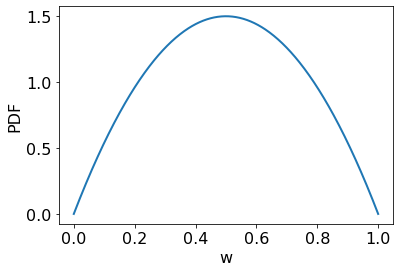

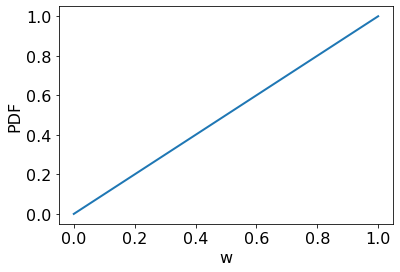

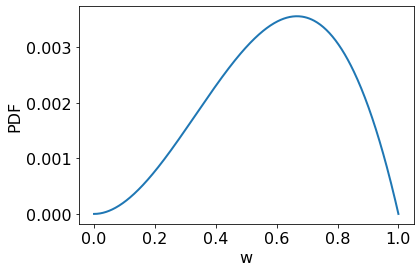

In [7]:
prior = stats.beta.pdf(w, 2, 2)
likelihood = binomlike(1, 1, w)
posterior = prior * likelihood
posterior /= np.sum(posterior)

fig = plt.figure()
plt.plot(w, prior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss3_head_prior')

fig = plt.figure()
plt.plot(w, likelihood, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss3_head_like')

fig = plt.figure()
plt.plot(w, posterior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss3_head_post')

## OR, in a Single Step (all tosses already made)

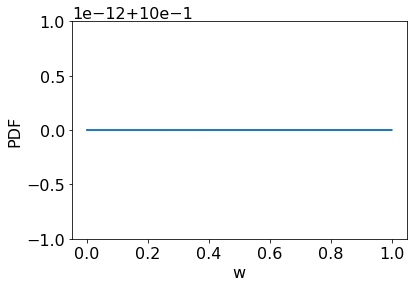

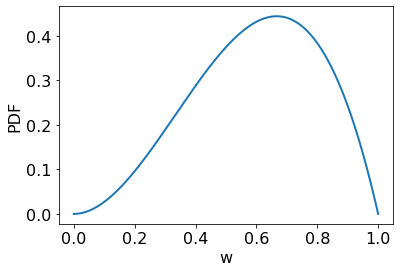

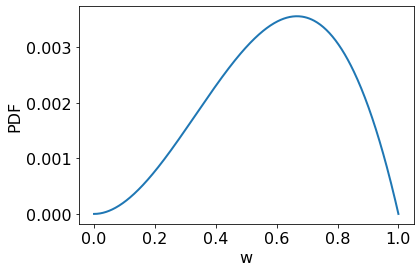

In [8]:
prior = stats.beta.pdf(w, 1, 1)
likelihood = binomlike(3, 2, w)
posterior = prior * likelihood
posterior /= np.sum(posterior)

fig = plt.figure()
plt.plot(w, prior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss3_head_priorALL')

fig = plt.figure()
plt.plot(w, likelihood, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss3_head_likeALL')

fig = plt.figure()
plt.plot(w, posterior, lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.show()
sf.best_save(fig, 'toss3_head_post_ALL')

## Effect of Prior

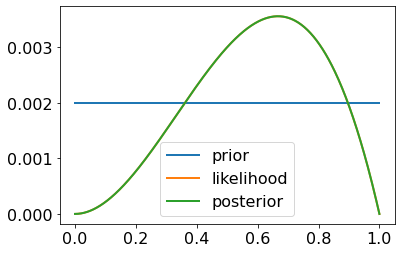

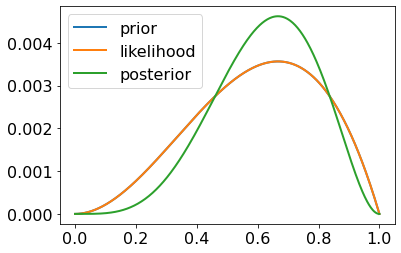

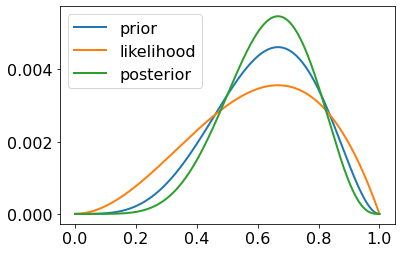

In [9]:
prior = stats.uniform.pdf(w) * 0.002
for t in range(3):
    likelihood = binomlike(3, 2, w)
    likelihood /= np.sum(likelihood)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)
    
    fig = plt.figure()
    plt.plot(w, prior, lw=2, label='prior')
    plt.plot(w, likelihood, lw=2, label='likelihood')
    plt.plot(w, posterior, lw=2, label='posterior')
    plt.legend(loc=0)
    plt.show()
    sf.best_save(fig, f'eff_prior_{t}')

    # update 
    prior = posterior

## Analytically Desribing the Posterior

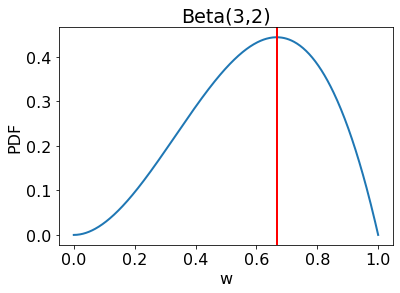

In [10]:
k, n = 2, 3
likelihood = binomlike(n, k, w)

MLE = k/n

fig = plt.figure()
plt.plot(w, likelihood, lw=2)
plt.axvline(MLE, c='r', lw=2)
plt.xlabel('w')
plt.ylabel('PDF')
plt.title('Beta(3,2)')
plt.show()

sf.best_save(fig, 'analyticalPost')

## Grid Approximation

In [11]:
x = np.linspace(0,10,100)

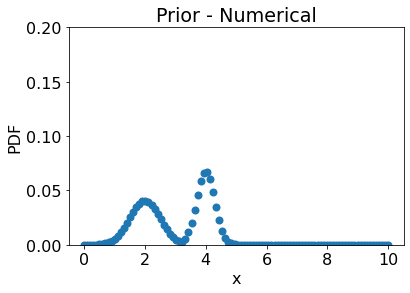

In [12]:
mode1 = stats.norm.pdf(x, 2, 0.5)
mode2 = stats.norm.pdf(x, 4, 0.3)

prior = mode1
prior[mode2 > mode1] = mode2[mode2 > mode1]
prior /= np.sum(prior) # normalize 

fig = plt.figure()
plt.scatter(x, prior, lw=2)
plt.ylim([0, 0.2])
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Prior - Numerical')
plt.show()

sf.best_save(fig, 'priorGA')

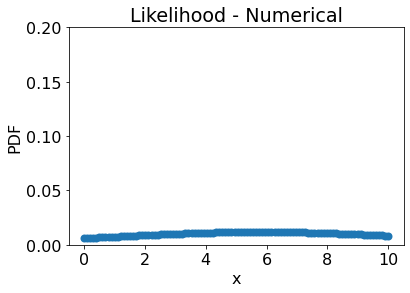

In [13]:
likelihood = stats.norm.pdf(x, 5.8, 5)
likelihood /= np.sum(likelihood) # normalize 

fig = plt.figure()
plt.scatter(x, likelihood, lw=2)
plt.ylim([0, 0.2])
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Likelihood - Numerical')
plt.show()

sf.best_save(fig, 'likeGA')

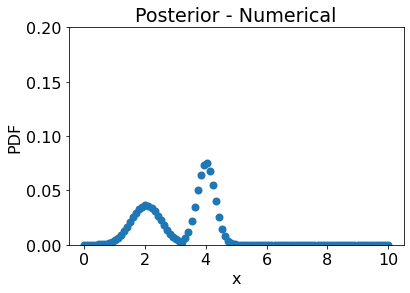

In [14]:
posterior = prior * likelihood
posterior /= np.sum(posterior) # normalize 

fig = plt.figure()
plt.scatter(x, posterior, lw=2)
plt.ylim([0, 0.2])
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Posterior - Numerical')
plt.show()

sf.best_save(fig, 'postGA')